In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with np.load('/data_distance_svd.npz') as data:
  xp, yp, zp = data['xp'], data['yp'], data['zp']

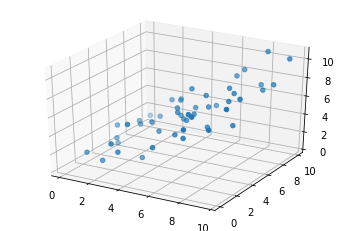

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp,yp,zp)

In [8]:
data = pd.DataFrame({'x' : xp, 'y' : yp, '1' : [1]*len(xp), 'z' : zp})
data.head()

,x,y,1,z
0,1.915195,1.118943,1,1.228688
1,6.221088,6.071937,1,5.862340
2,4.377277,5.659446,1,5.397225
3,7.853586,0.067641,1,7.042889
4,7.799758,6.174417,1,7.738201


In [10]:
x_a = np.array(data.values[:,0:3])
z_a = np.array(data.values[:,3])
U, S, V = np.linalg.svd(x_a)

print(S)

[55.97347811 19.06065085  2.52886122]


In [11]:
S1 = np.eye(3, 50)
for i in range(3):
  S1[i][i] = (1/S[i])

res = V.T @ S1 @ U.T @ z_a
print(res) #уравнение плоскости z = ax + by + c

[0.78161197 0.18022171 0.27795506]


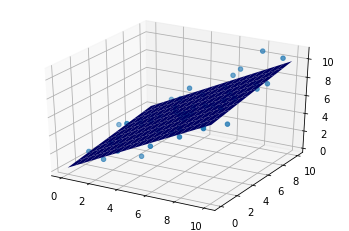

<Figure size 432x288 with 0 Axes>

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xp,yp,zp)

u, v = np.mgrid[0:10:20j, 0:10:10j]
x=u
y=v
z=res[0]*x + res[1]*y + res[2]

fig = plt.figure()
ax.plot_surface(x,y,z, color='b')